Group assignment with Anastasia and Pelin

Assignment 3 is a group assignment for the Data Science Foundations course.

We will use the data from this competition https://www.drivendata.org/competitions/1/united-nations-millennium-development-goals/.

1. Load the data from the competition, removing any possible meaningless column.

2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes


1. Load the data from the competition, removing any possible meaningless column.

In [208]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/allison/Desktop/BTSMBDS/Data Science Foundations/data/TrainingSet.csv").drop(["Unnamed: 0"], axis = 1)

#dropped the column 'Unnamed: 0'

In [43]:
print (data.shape)
data.head()

(195402, 39)


,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


In [3]:
#We now know that there are almost 200,000 rows in this dataset, and 40 datapoints. There are many missing data points in the dataset. 

2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

In [44]:
#splitting the Series Code column into two: Global Category and Other Category

data[['Global Category','Other Category']] = data.pop('Series Code').str.split('.', n=1, expand=True)

In [45]:
data['Global Category'].nunique()

62

In [6]:
#There are 62 unique categories

3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

In [51]:
def series_in_country(country_name):

    #new dataframe filtered by country, new index set to Series name, and then transposed so that years become index
    data_new = data.loc[data['Country Name'] == country_name].set_index(['Series Name']).T
    
    #Fixing the year labels to only show the year (and not the unnecessary extra digits)
    data_new.index = data_new.index.str[0:5].astype(str)
    data_new.index.name = 'Year'
    
    #Drop the last three rows from newly transposed dataframe(Country, Global category, Other)
    data_new.drop(data_new.tail(3).index,inplace=True)
    
    return data_new

series_in_country('Australia').head()


Series Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Achieve universal primary education,"Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),...,Urban population growth (annual %),"Vulnerable employment, female (% of female employment)","Vulnerable employment, male (% of male employment)","Vulnerable employment, total (% of total employment)","Wage and salaried workers, female (% of females employed)","Wage and salaried workers, total (% of total employed)","Wage and salary workers, male (% of males employed)","Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women's share of population ages 15+ living with HIV (%)
Year,,,,,,,,,,,,,,,,,,,,,
1972,NaN,NaN,NaN,NaN,NaN,5.70532,2.08129e+11,4.27464e+10,3.78006,15794.9,...,1.99166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4414,NaN
1973,NaN,NaN,0.947445,95.2112,94.3026,5.37159,2.19309e+11,5.26114e+10,3.7729,16390.8,...,1.68211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.6032,NaN
1974,NaN,NaN,0.940536,94.5678,93.5667,2.64034,2.25099e+11,7.27916e+10,0.0748926,16403.1,...,2.68426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.8359,NaN
1975,NaN,NaN,0.967162,96.9399,96.5041,0.784712,2.26865e+11,8.0096e+10,-0.448527,16329.5,...,1.38401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3716,NaN
1976,NaN,NaN,0.976627,97.7316,97.5971,2.40162,2.32314e+11,8.63855e+10,1.38001,16554.8,...,0.965168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5639,NaN


In [56]:
def countries_in_series(series_name):
     
    x = data.loc[data['Series Name'] == series_name, 'Country Name']
    return  list(x), len(list(x))
    
countries_in_series('Achieve universal primary education')


(['Afghanistan',
  'Albania',
  'Algeria',
  'Angola',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas, The',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Botswana',
  'Brunei Darussalam',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cabo Verde',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cayman Islands',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo, Dem. Rep.',
  'Congo, Rep.',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Cyprus',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt, Arab Rep.',
  'El Salvador',
  'Equatorial Guinea',
  'Eritrea',
  'Estonia',
  'Ethiopia',
  'Fiji',
  'Finland',
  'France',
  'French Polynesia',
  'Gabon',
  'Gambia, The',
  'Georgia',
  'Germany',
  'Ghana',
  'Greece',
  'Grenada',
  'Gua

4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

In [80]:
#Note that there is no data for Russian Federation (Anastasia), so we are using Australia (Allison), Turkey (Pelin), and Spain

#Created new dataframe filtered by Alternative and nuclear energy series name, and including only data for our countries, and then transposing so the countries are the column titles
our_countries = data.loc[((data['Country Name'] == 'Australia')|(data['Country Name'] == 'Turkey')|(data['Country Name'] == 'Spain')) & (data['Series Name']=='Alternative and nuclear energy (% of total energy use)')].set_index(['Country Name']).T

#removing unnecessary letters from year labels
our_countries.index = our_countries.index.str[0:5].astype(str)
our_countries.index.name = 'Year'

#Drop the last four rows from newly transposed dataframe(Country, Global category, Other, Series Name)
our_countries.drop(our_countries.tail(3).index,inplace=True)

our_countries.head()


Country Name,Australia,Spain,Turkey
Year,,,
1972,1.87181,9.56525,1.42012
1973,1.71997,8.12863,1.1181
1974,1.93077,8.07096,1.34412
1975,2.09709,7.31891,2.10579
1976,2.10287,6.10673,2.67164


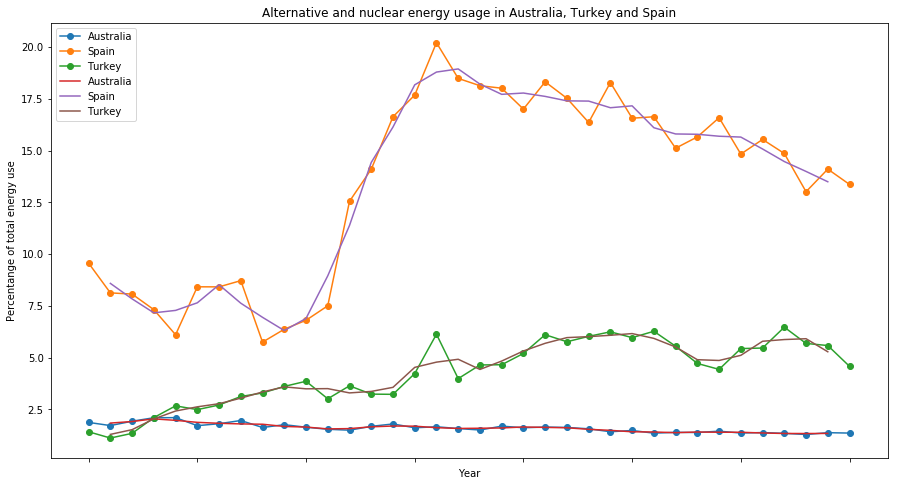

In [247]:
ax = our_countries.plot(legend = True, figsize = (15, 8), style="o-", label= 'Country Name')
plt.xlabel('Year')
plt.ylabel('Percentange of total energy use')
plt.title('Alternative and nuclear energy usage in Australia, Turkey and Spain')
our_countries.rolling(center = True, window = 3).mean().plot(legend = True, figsize = (15, 8), label = 'Country Name' + ' rolling mean', style="-", ax=ax)
plt.legend(loc='upper left')
plt.plot();

#NEED HELP WITH THE XTICKS AND LEGEND TO SHOW 'ROLLING MEAN'

5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

In [90]:
#locate the data for the electricity production series name, set the index to Country Name, and then transpose
largest_8 = data.loc[data['Series Name'] == 'Electricity production from coal sources (kWh)']

#create new column that calculates the average electricity production across all years in the dataframe
largest_8['mean'] = largest_8.loc[:, '1972 [YR1972]':'2007 [YR2007]'].mean(1)

#filter dataframe to the 8 countries with the largest mean
largest_8 = largest_8.nlargest(8, columns='mean', keep='first').set_index(['Country Name']).T

#Re-name the years to remove unnecessary labels
largest_8.index = largest_8.index.str[0:5].astype(str)
largest_8.index.name = 'Year'

#Drop the last four rows from newly transposed dataframe(Country, Global category, Other, Series Name)
largest_8.drop(largest_8.tail(4).index,inplace=True)
    
largest_8.head()

#Ok in the above we create a new dataframe that includes only data for the relevant series name, 
#then creates a new column that calculates the mean of  all of the values across the years.
#We then clean the index names and drop the last 4 columns, as earlier.

/Users/allison/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Country Name,United States,China,Germany,India,United Kingdom,Russian Federation,South Africa,Japan
Year,,,,,,,,
1972,8.2497e+11,9.7753e+10,2.50348e+11,3.6681e+10,1.45241e+11,NaN,5.8684e+10,4.16e+10
1973,9.0736e+11,9.7713e+10,2.58316e+11,3.5958e+10,1.74609e+11,NaN,6.3405e+10,3.73e+10
1974,8.64682e+11,9.6845e+10,2.62491e+11,4.1039e+10,1.48831e+11,NaN,6.851e+10,3.9761e+10
1975,8.90852e+11,1.10665e+11,2.42829e+11,4.4111e+10,1.69468e+11,NaN,7.3774e+10,4.2317e+10
1976,9.87113e+11,1.0436e+11,2.78488e+11,5.1775e+10,1.79867e+11,NaN,7.7453e+10,4.377e+10


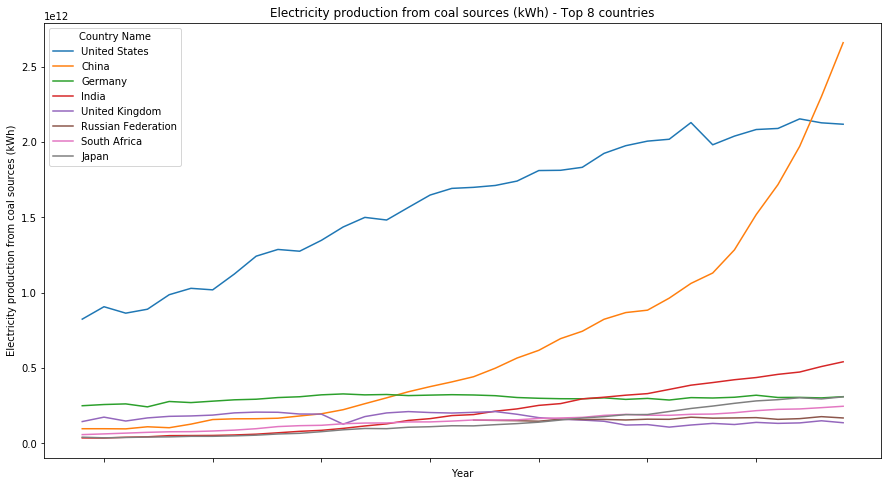

In [93]:
largest_8.plot(figsize = (15, 8));
plt.xlabel('Year')
plt.xticks(np.arange(1, 35, step=5))
plt.ylabel('Electricity production from coal sources (kWh)')
plt.title('Electricity production from coal sources (kWh) - Top 8 countries')

plt.plot();

6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

In [189]:
#locate the data for the electricity production series name, set the index to Country Name, and then transpose
pct_inc = data.loc[data['Series Name'] == 'Electricity production from coal sources (kWh)'].set_index(['Country Name']).T

#Re-name the years to remove unnecessary labels
pct_inc.index = pct_inc.index.str[0:5].astype(str)
pct_inc.index.name = 'Year'

#Drop the last three rows from newly transposed dataframe(Country, Global category, Other)
pct_inc.drop(pct_inc.tail(3).index,inplace=True)

#Filter to only the last 5 rows, and include only non-zero columns
pct_inc = pct_inc.tail(5).loc[:, (pct_inc != 0).all(axis=0)]

pct_inc

Country Name,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Canada,Chile,...,Sweden,Thailand,Turkey,Ukraine,United Kingdom,United States,Uzbekistan,Vietnam,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2003,9.3e+08,1.72249e+11,9.512e+09,1.1608e+10,6.628e+09,6.95e+08,9.093e+09,1.9462e+10,1.12632e+11,4.878e+09,...,4.165e+09,1.9369e+10,3.2252e+10,5.4643e+10,1.39842e+11,2.08333e+12,2.018e+09,7.237e+09,1.6e+07,3.44e+09
2004,1.67e+09,1.78572e+11,9.109e+09,1.1481e+10,6.617e+09,7.36e+08,1.0582e+10,1.9107e+10,1.01256e+11,7.718e+09,...,1.821e+09,2.0605e+10,3.4448e+10,4.5128e+10,1.33268e+11,2.0905e+12,2.043e+09,7.173e+09,1.2e+07,4.197e+09
2005,2.172e+09,1.816e+11,8.486e+09,1.0493e+10,6.463e+09,8.61e+08,1.0742e+10,1.8625e+10,1.09984e+11,7.212e+09,...,1.405e+09,2.0522e+10,4.3192e+10,5.0013e+10,1.36336e+11,2.15396e+12,2.009e+09,1.2173e+10,1.6e+07,4.435e+09
2006,1.986e+09,1.85301e+11,8.412e+09,9.216e+09,7.293e+09,8.6e+08,1.05e+10,1.9206e+10,1.08147e+11,1.0599e+10,...,1.537e+09,2.5309e+10,4.665e+10,6.4942e+10,1.5048e+11,2.1278e+12,2.081e+09,1.4112e+10,7e+06,2.735e+09
2007,2.328e+09,1.87224e+11,7.647e+09,8.327e+09,7.627e+09,7.2e+08,1.0098e+10,2.2463e+10,1.15725e+11,1.3259e+10,...,1.35e+09,3.0768e+10,5.3431e+10,6.7101e+10,1.37491e+11,2.11846e+12,2e+09,1.4618e+10,1e+06,2.297e+09


7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

In [196]:
countries_in_series('Life expectancy at birth, total (years)')

(['Afghanistan',
  'Albania',
  'Algeria',
  'Angola',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas, The',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'Brunei Darussalam',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cabo Verde',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Central African Republic',
  'Chad',
  'Channel Islands',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo, Dem. Rep.',
  'Congo, Rep.',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Curacao',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt, Arab Rep.',
  'El Salvador',
  'Equatorial Guinea',
  'Eritrea',
  'Estonia',
  'Ethiopia',
  'Faeroe Islands',
  'Fiji',
  'Finland',
  'France',
  'French Polynesia',
  

In [201]:
207/(data['Country Name'].nunique())

0.9672897196261683

In [ ]:
#97% of all countries focus on this development indicator

/Users/allison/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


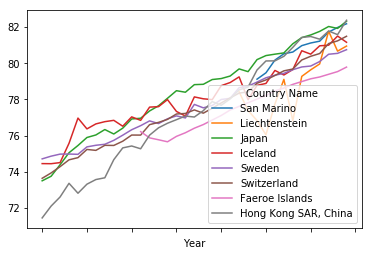

In [216]:
#locate the data for the electricity production series name, set the index to Country Name, and then transpose
life_exp = data.loc[data['Series Name'] == 'Life expectancy at birth, total (years)']

#create new column that calculates the average electricity production across all years in the dataframe
life_exp['mean'] = life_exp.loc[:, '1972 [YR1972]':'2007 [YR2007]'].mean(1)

#filter dataframe to the 8 countries with the largest mean
life_exp = life_exp.nlargest(8, columns='mean', keep='first').set_index(['Country Name']).T

#Re-name the years to remove unnecessary labels
life_exp.index = life_exp.index.str[0:5].astype(str)
life_exp.index.name = 'Year'

#Drop the last four rows from newly transposed dataframe(Country, Global category, Other, Series Name)
life_exp.drop(life_exp.tail(4).index,inplace=True)
    
life_exp.plot()

#Ok in the above we create a new dataframe that includes only data for the relevant series name, 
#then creates a new column that calculates the mean of  all of the values across the years.
#We then clean the index names and drop the last 4 columns, as earlier.

/Users/allison/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


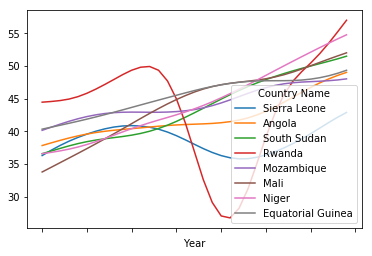

In [222]:
#locate the data for the electricity production series name, set the index to Country Name, and then transpose
life_exp2 = data.loc[data['Series Name'] == 'Life expectancy at birth, total (years)']

#create new column that calculates the average electricity production across all years in the dataframe
life_exp2['mean'] = life_exp2.loc[:, '1972 [YR1972]':'2007 [YR2007]'].mean(1)

#filter dataframe to the 8 countries with the largest mean
life_exp2 = life_exp2.nsmallest(8, columns='mean', keep='first').set_index(['Country Name']).T

#Re-name the years to remove unnecessary labels
life_exp2.index = life_exp2.index.str[0:5].astype(str)
life_exp2.index.name = 'Year'

#Drop the last four rows from newly transposed dataframe(Country, Global category, Other, Series Name)
life_exp2.drop(life_exp2.tail(4).index,inplace=True)
    
life_exp2.plot()

#Ok in the above we create a new dataframe that includes only data for the relevant series name, 
#then creates a new column that calculates the mean of  all of the values across the years.
#We then clean the index names and drop the last 4 columns, as earlier.